<a href="https://colab.research.google.com/github/NMashalov/2023_OpenMipt_course/blob/main/lesson3/%D0%94%D0%97_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 3

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Отрисовка изображений &mdash; 10 баллов
* Построение сети ResNet &mdash; 80 баллов
* Transfer Learning &mdash; 30 баллов





-----

In [ ]:
# Bot check

# HW_ID: phds_hw3
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

## Сверточные сети

В этой домашней работе вам предстоит улучшить сверточную сеть для классификации изображений.

#### Биология
Необходимо классифицировать изображения МРТ головного мозга из датасета [**"Brain Tumor Classification (MRI)"**](https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri) и определить вид опухоли.

#### Физика
Необходимо классифицировать изображения солнечного затмения из датасета [**"Solar Eclipse Classification"**](https://www.kaggle.com/datasets/tshr147/solar-eclipse-classification) по степени: частичное, полное и кольцевое.

## Задача 1.

**Пожалуйста, ПРОЧИТАЙТЕ ВНИМАТЕЛЬНО то, что написано ниже, там изложены требования к вашей работе и полезные советы!**


**Требование к работе**

* **Запрещено** использовать тестовые данные где-либо за исключением вычисления финальной оценки качества. Подсказка &mdash; распределение данных на тесте такое же как в тестовых данных.


### Советы

#### Архитектура нейросети
* В отличие от семинара в данном датасете могут встретиться картинки разных размеров. Эту проблему можно решить двумя способами:
  - Используя `torchvision.transforms.Resize` можно привести картинки к единому размеру. Если вы решите использовать этот способ, стоит посмотреть, какого в принципе размера встречаются картинки, чтобы не сжать их слишком сильно. Для картинок одного размера можно обучить бейзлайн в виде полносвязной сети.
  - Учесть переменный размер картинки в архитектуре сети. Общий принцип здесь такой: можно использовать свертки с нужным `padding`, чтобы не иметь проблем из-за уменьшения размеров картинки из-за сверток, последовательно применяя сверточные слои и пуллинги, нужно увеличивать количество каналов одновременно с уменьшением размера картинок (из-за пуллинга), а в конце, получив картинку размера (n_channels, nx, ny), оставить вектор размера (n_channels) (n_channels будет одинаковым для всех картинок, поскольку зависит от архитектуры сети!). Сделать это можно усреднением по пространственным картам [torch.nn.AdaptiveAvgPool2d](https://pytorch.org/docs/stable/generated/torch.nn.AdaptiveAvgPool2d.html).
* Попробуйте разные размеры фильтров, страйдинг, паддинг
* Также можно попробовать разные активации: `tanh`, `leaky relu` и другие.

#### Процесс обучения
* Воспользуйтесь GPU google colab или любой другой GPU, которая у вас есть.
* Для сокращения вычислительной сложности можно поэксперементировать с параметром `stride`. Кроме того можете попробовать разные виды Poooling-ов.
* Помните, что некоторым нейросетям требуется $10$ эпох, чтобы сойтись, а некоторым – $500$. Большие нейросети дольше обучаются.
* Если вы достигли какого-то порога на валидации лучше подождать примерно 10 эпох перед тем как останавливать обучение.

#### И главное:
* Рисуйте кривые обучения: loss и метрика качества (лучше использовать F1-меру) для обучения и валидации.

In [24]:
! pip install torchinfo

from torchinfo import summary

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil

import torch
from torch import nn
import torchvision
from torchvision import transforms
from sklearn.metrics import f1_score
from sklearn.utils.random import sample_without_replacement
from IPython.display import Image, clear_output
from collections import defaultdict
from torch.optim import lr_scheduler
from matplotlib.animation import FuncAnimation, ImageMagickFileWriter
import time

%matplotlib inline

In [26]:
torch.cuda.is_available()

False

In [32]:
mv kaggle.json /root/.kaggle/

In [33]:
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri
!unzip brain-tumor-classification-mri.zip

 69% 60.0M/86.8M [00:00<00:00, 225MB/s]
100% 86.8M/86.8M [00:00<00:00, 227MB/s]
Archive:  brain-tumor-classification-mri.zip
  inflating: Testing/glioma_tumor/image(1).jpg  
  inflating: Testing/glioma_tumor/image(10).jpg  
  inflating: Testing/glioma_tumor/image(100).jpg  
  inflating: Testing/glioma_tumor/image(11).jpg  
  inflating: Testing/glioma_tumor/image(12).jpg  
  inflating: Testing/glioma_tumor/image(13).jpg  
  inflating: Testing/glioma_tumor/image(14).jpg  
  inflating: Testing/glioma_tumor/image(15).jpg  
  inflating: Testing/glioma_tumor/image(16).jpg  
  inflating: Testing/glioma_tumor/image(17).jpg  
  inflating: Testing/glioma_tumor/image(18).jpg  
  inflating: Testing/glioma_tumor/image(19).jpg  
  inflating: Testing/glioma_tumor/image(2).jpg  
  inflating: Testing/glioma_tumor/image(20).jpg  
  inflating: Testing/glioma_tumor/image(21).jpg  
  inflating: Testing/glioma_tumor/image(22).jpg  
  inflating: Testing/glioma_tumor/image(23).jpg  
  inflating: Testing/gliom

In [34]:
DATA_PATH = '/content/'
train_path = 'Training'
test_path = 'Testing'

### Подготовка датасетов

In [35]:
# Папка с изображениями для тренировки
TRAIN_DIR = os.path.join(DATA_PATH, train_path)
# Папка с изображениями для валидации
VAL_DIR = os.path.join(DATA_PATH, "val")

# Папка с изображениями для теста
TEST_DIR = os.path.join(DATA_PATH, test_path)

In [36]:
! rm -rf $VAL_DIR
os.makedirs(VAL_DIR, exist_ok=True)

# Считываем названия директорий
DIR_LIST = {i:name for i, name in enumerate(os.listdir(TRAIN_DIR))}
# Доля изображений в валидации
VAL_FRAC = 0.3

# Создаем директорию с валидационной выборкой для каждого класса
for dir in DIR_LIST.values():
    os.makedirs(os.path.join(VAL_DIR, dir), exist_ok=True)

    # Считываем выборку изображений
    dir_path = os.path.join(TRAIN_DIR, dir)

    # Сортируем изображения для детерминированнсти
    images_filename = sorted(os.listdir(dir_path))

    # Выбираем случайные изображения из выборки для валидции, с установленным random_state
    num_images = len(images_filename)
    num_val = int(num_images * VAL_FRAC)
    indices = sample_without_replacement(num_images, num_val, random_state=42)
    val_images = np.take(images_filename, indices)

    print(f'{dir} | train images = {num_images - num_val} | val images = {num_val}')

    # Сохраняем валидационную выборку
    for image_filename in val_images:
        source = os.path.join(TRAIN_DIR, dir, image_filename)
        destination = os.path.join(VAL_DIR, dir, image_filename)
        shutil.copy(source, destination)
        os.remove(source)

no_tumor | train images = 277 | val images = 118
pituitary_tumor | train images = 579 | val images = 248
meningioma_tumor | train images = 576 | val images = 246
glioma_tumor | train images = 579 | val images = 247


In [37]:
!ls $TRAIN_DIR

glioma_tumor  meningioma_tumor	no_tumor  pituitary_tumor


In [38]:
!ls $VAL_DIR

glioma_tumor  meningioma_tumor	no_tumor  pituitary_tumor


Отрисуйте по 3 изображения для каждого класса.

In [89]:
from torchvision.transforms import v2

train_transform = transforms.Compose([
    v2.RandomHorizontalFlip(p=0.5),
    v2.ToTensor(),
    v2.Grayscale(1),
])


val_transform = transforms.Compose([
    v2.ToTensor(),
    v2.Grayscale(1),
])

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `transforms.Compose([transforms.ToImageTensor(), transforms.ConvertImageDtype()])`.
  warnings.warn(


In [90]:
train_dataset = torchvision.datasets.ImageFolder(TRAIN_DIR, transform=train_transform)
val_dataset = torchvision.datasets.ImageFolder(VAL_DIR, transform=val_transform)

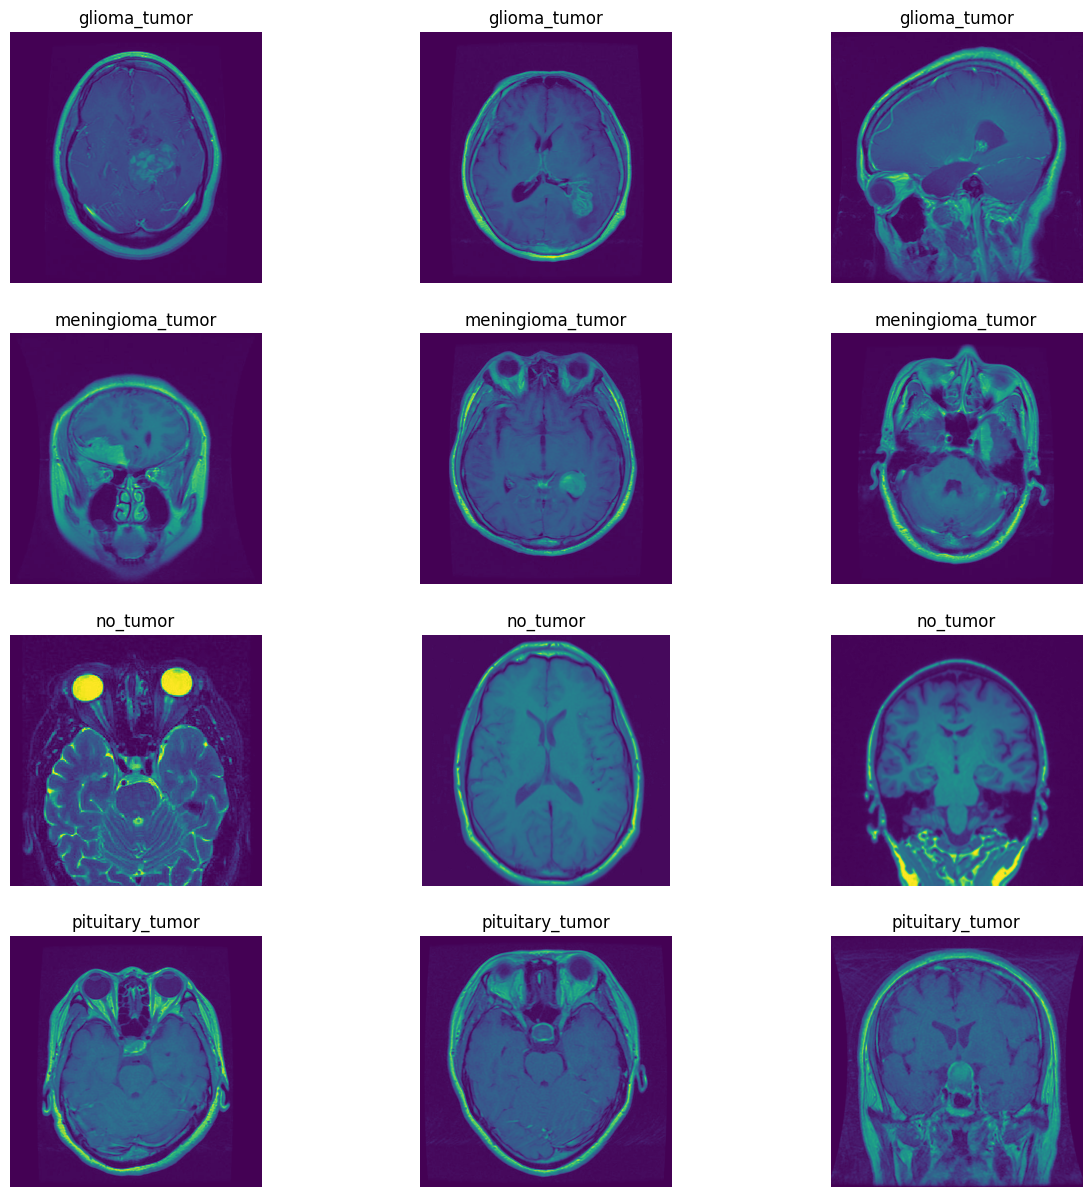

In [94]:
#ваш код
plt.figure(figsize=(15, 15))
counter = 0
labels = ('glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor')
for img,target in train_dataset:
    if target == counter //3:
        plt.subplot(4, 3, counter+1)
        counter+=1
        plt.imshow(img.squeeze())
        plt.title(labels[target])
        plt.axis("off")

### I. Построение сети ResNet

В первой части задания вам предстоит имплементировать сеть ResNet.

#### Архитектура сети

<img src="https://github.com/NMashalov/2023_OpenMipt_course/blob/main/lesson3/resblock.png?raw=1" width="400" align="right" >

Артихектура сети выглядит следующим образом

- В начале сети применяется сверточный слой с большим размером ядра (можно взять 5-7) и пулинг для уменьшения размерности входного изображения.
- Далее следует какое-то количество ResidualBlock'ов. Блоки бывают двух типов: не меняющие пространственную и канальную размерности и сжимающие изображение одновременно с увеличением количества каналов. По мере продвижения в глубину сети количество каналов должно увеличиваться.
- Перед предсказанием класса применяется Global Average Pooling для получения вектора фиксированной размерности, равной количеству каналов в конце сети.
- Предсказание выполняется одним линейным слоем.

Посмотрим как выглядит эффективный ResidualBlock, использованный в оригинальной статье


1. Сначала применяется свертка 1х1 для уменьшения количества каналов (чтобы свертка с размером ядра 3 применялась к изображению с меньшим количеством каналов, т.е. работала быстрее и с меньшим количеством параметров)
2. Далее делается основное преобразование: обычно это типичная последовательность действий `Conv -> BN -> Act`, не меняющая канальную размерность (она меняется при необходимости дальше из тех же соображений, что в п.1). В случае необходимости понизить пространственную размерность можно с помощью параметра `stride` у свертки.
3. Далее с помощью свертки 1х1 изображение приводится к желаемому количеству каналов.
4. В конце к выходу блока прибавляется вход (тот самый skip-connection). В случае если блок понижает пространственную размерность и повышает канальную, размерности исходного изображения и изображения после сверток не сходятся, поэтому перед сложением приходится применять дополнительное преобразование к исходной картинке. Его можно сделать с помощью все той же свертки 1х1 с параметром `stride`, соответствующим основному преобразованию.

#### Реализация сети

В ходе реализации сети вам могут помочь следующие рекомендации

Поскольку мы имеем дело с небольшими датасетами и небольшим количеством классов (и не собираемся доводить до 2048 каналов в конце), нет жесткой необходимости оптмизировать работу сверточных блоков. Вместо этого предлагается сделать менее эффективный, но более богатый параметрами блок. Можно использовать последовательность операций `Conv -> BN -> Act -> Conv -> BN` (перед сложением с "входом" блока лучше на ставить активацию), где одна из сверток выполняется со `stride=2`, если требуется. Также для облегчения обучения сети можно использовать свертку 1х1 (не забывайте нормализацию!) для преобразования входа, даже если увеличение количества каналов и уменьшение размерности не требуется.

1. Реализуйте отдельно ResidualBlock. Убедитесь, что он работает, как ожидается, и в случае сохранения размера изображения, и в случае его изменения. Для удобства мы даем вам шаблон. Не забудьте использовать `padding`.
2. Не забудьте сжать картинку перед применением ResidualBlock'ов с помощью свертки и пулинга. Степень сжатия зависит от размера вашего исходного изображения. Для размера изображения 256х256 можно попробовать сжать в 2-4 раза.
3. Global Average Pooling реализован в PyTorch классом `nn.AdaptiveAvgPool2d`. Для использования в нашей сети его можно добавить после последнего сверточного слоя следующим образом `nn.AdaptiveAvgPool2d((1, 1))`.
4. Вам не нужен ResNet50 :) Для проверки обучения начните с нескольких блоков, которые постепенно сжимают изображение - разжимают каналы в 2 раза. Тем не менее ваша сеть должна постепенно доводить канальную размерность не меньше, чем до 256 каналов.

Для начала реализуйте блок.

In [50]:
import torch
import torch.nn as nn
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super().__init__()
        self.in_channels = in_channels
        self.inner_channels =  in_channels // 4
        self.out_channels = out_channels

        # последовательность операций самого блока
        self.blocks = nn.Sequential(
            nn.Conv2d(self.in_channels, self.inner_channels, kernel_size=1),
            nn.BatchNorm2d(self.inner_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(self.inner_channels, self.inner_channels, kernel_size=stride,stride=stride), # сжимаем изображение в stride раз
            nn.BatchNorm2d(self.inner_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(self.inner_channels,self.out_channels,kernel_size=3,padding=1),
            nn.BatchNorm2d(self.out_channels),
        )
        # преобразование над входом до сложения с выходом
        self.downsample = nn.Sequential(
            nn.Conv2d(self.in_channels, self.out_channels, kernel_size=stride,stride=stride),
            nn.BatchNorm2d(self.out_channels),
        )

        self.bn = nn.BatchNorm2d(self.out_channels)
        self.relu = nn.ReLU()


    def forward(self, x):
        main_block = self.blocks(x)
        resiudal =  self.downsample(x)
        return self.relu(self.bn(main_block + resiudal))

Протестируйте блок.

In [51]:
image_batch = torch.ones((3, 16, 67, 67))
block1 = ResidualBlock(16, 16, 1)
assert block1(image_batch).shape == (3, 16, 67, 67), f'Блок не должен менять размер изображения {block1(image_batch).shape}'

In [52]:
image_batch = torch.ones((3, 16, 64, 64))
block1 = ResidualBlock(16, 32, 2)
assert block1(image_batch).shape == (3, 32, 32, 32), 'Блок должен сжать изображение в 2 раза и увеличить количество выходных каналов до 32'

Реализуйте сеть целиком.

In [73]:
class ResNet(nn.Module):
    def __init__(self, num_classes, num_layers=None, layers_params=None):
        """
        Класс реализующий сеть типа ResNet

        param num_classes: количество классов, предсказываемых сетью
        param num_layers: список количества блоков с параметрами layers_params, которые будут добавлены в сеть
        param layers_params: список словарей параметров блоков
        """
        super().__init__()
        # количество классов для классификации
        self.num_classes = num_classes

        # дефолтные значения для примера
        if num_layers is None:
            num_layers = [1, 1, 1, 1, 1]
        if layers_params is None:
            layers_params = [
                {"in_channels": 16, "out_channels": 32, "stride": 2},
                {"in_channels": 32, "out_channels": 64, "stride": 2},
                {"in_channels": 64, "out_channels": 64, "stride": 1},
                {"in_channels": 64, "out_channels": 128, "stride": 2},
                {"in_channels": 128, "out_channels": 128, "stride": 1}
            ]

        assert len(num_layers) == len(layers_params), 'Размеры списков, задающих параметры сети, должны быть одинаковы'

        # Слои до residual блоков
        self.preprocess = nn.Sequential(
            nn.Conv2d(1,16,kernel_size=7,padding=3),
            nn.MaxPool2d(kernel_size=2,stride=2),
            nn.BatchNorm2d(16),
            nn.ReLU(inplace=True),

        )

        # Задаем блоки с помощью num_layers и layers_params
        self.residual_blocks = nn.Sequential(*[ResidualBlock(**layer) for layer in layers_params])

        # Голова сети
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))

        self.last_channels = 128 # ваш код
        self.fc = nn.Linear(self.last_channels, num_classes)
        self.drop = nn.Dropout(0.1)

    def forward(self, x):
        x = self.preprocess(x)
        x = self.residual_blocks(x)
        x = self.avgpool(x).view(x.size(0),-1)
        x = self.fc(self.drop(x))
        return x

Проверьте, что сеть работает

In [74]:
resnet = ResNet(num_classes=4)
image_batch = torch.ones((3, 1, 36, 36))
resnet(image_batch).shape

torch.Size([3, 4])

In [76]:
image_batch = torch.ones((3, 1, 132, 177))
resnet(image_batch).shape

torch.Size([3, 4])

### Обучение сети

**Важные советы:**

1. Если сеть с дефолтным значением lr начнет слишком нестабильно учиться, уменьшите его.
2. Используйте lr_scheduler для улучшения сходимости на более поздних итерациях. Можно, например, уменьшать lr в 2 раза после 3 эпох отсутствия улучшения метрики F1-macro.
3. Используйте параметр `weight_decay`, если сеть будет склонна к переобучению. Начать можно со значения 0.1.
4. Используйте аугментации для борьбы с переобучением. Отличный вариант - не слишком жесткие геометрические преобразования.


Напишите функцию для обучения сети, куда можно передавать аугментации и lr_scheduler в качестве параметров. Используйте их для экспериментов. Также ваша функция должна в качестве параметра принимать директорию, куда будут сохраняться чекпойнты сети по ходу обучения (можете сохранять после каждой эпохи, а можете - только лучший по метрике F1-macro). Создать директорию из функции можно с помощью `os.makedirs(checkpoints_dir)`, а путь к чейкпойнту задавать с помощью `os.path.join(checkpoints_dir, f'epoch_{epoch}.checkpoint')` (для случая сохранения после каждой эпохи). Для сохранения сети используйте `torch.save(model.state_dict(), PATH)`.



**Ваша задача:** добиться метрики F1-macro > 60% на тестовом наборе. Опишите свои эксперименты.

In [77]:
import seaborn as sns
def plot_learning_curves(history, ax = None, no_train=False, annotation=''):
    '''
    Функция для вывода лосса и метрики во время обучения.

    :param history: (dict)
        accuracy и loss на обучении и валидации
    '''
    sns.set_style(style='whitegrid')
    if ax is None:
        fig,ax = plt.subplots(1,2,figsize=(20, 7))

    if no_train:
        ax[0].plot(history['loss']['train'], label='Train:' + annotation)
    ax[0].plot(history['loss']['val'], label='Val: ' + annotation )
    ax[0].set(ylabel='лосс', xlabel='эпоха', title='Лосс')
    ax[0].legend()
    if no_train:
        ax[1].plot(history['acc']['train'], label='Train'+annotation)
    ax[1].plot(history['acc']['val'], label='Val: ' +annotation)
    ax[1].set(ylabel='Точность', xlabel='эпоха', title='Точность')
    ax[1].legend()
def train(
    model,
    criterion,
    optimizer,
    train_batch_gen,
    val_batch_gen,
    device,
    num_epochs=50,
    plot_true = True,
    scheduler = None
):
    '''
    Функция для обучения модели и вывода лосса и метрики во время обучения.

    :param model: обучаемая модель
    :param criterion: функция потерь
    :param optimizer: метод оптимизации
    :param train_batch_gen: генератор батчей для обучения
    :param val_batch_gen: генератор батчей для валидации
    :param num_epochs: количество эпох

    :return: обученная модель
    :return: (dict) accuracy и loss на обучении и валидации ("история" обучения)
    '''

    history = defaultdict(lambda: defaultdict(list))

    for epoch in range(num_epochs):
        train_loss = 0
        train_acc = 0
        val_loss = 0
        val_acc = 0

        start_time = time.time()

        # Устанавливаем поведение dropout / batch_norm  в обучение
        model.train(True)

        # На каждой "эпохе" делаем полный проход по данным
        for X_batch, y_batch in train_batch_gen:
            # Обучаемся на батче (одна "итерация" обучения нейросети)
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)

            # Логиты на выходе модели
            logits = model(X_batch)

            # Подсчитываем лосс
            loss = criterion(logits, y_batch.long().to(device))

            # Обратный проход
            loss.backward()
            # Шаг градиента
            optimizer.step()
            # Зануляем градиенты
            optimizer.zero_grad()

            # Сохраяняем лоссы и точность на трейне
            train_loss += loss.detach().cpu().numpy()
            y_pred = logits.max(1)[1].detach().cpu().numpy()
            train_acc += np.mean(y_batch.cpu().numpy() == y_pred)

        if scheduler:
            scheduler.step()

        # Подсчитываем лоссы и сохраням в "историю"
        train_loss /= len(train_batch_gen)
        train_acc /= len(train_batch_gen)
        history['loss']['train'].append(train_loss)
        history['acc']['train'].append(train_acc)

        # Устанавливаем поведение dropout / batch_norm в режим тестирования
        model.train(False)

        # Полный проход по валидации
        for X_batch, y_batch in val_batch_gen:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
         # Логиты, полученные моделью
            logits = model(X_batch)

            # Лосс на валидации
            loss = criterion(logits, y_batch.long().to(device))

            # Сохраяняем лоссы и точность на валидации
            val_loss += loss.detach().cpu().numpy()
            y_pred = logits.max(1)[1].detach().cpu().numpy()
            val_acc += np.mean(y_batch.cpu().numpy() == y_pred)



        # Подсчитываем лоссы и сохраням в "историю"
        val_loss /= len(val_batch_gen)
        val_acc /= len(val_batch_gen)
        history['loss']['val'].append(val_loss)
        history['acc']['val'].append(val_acc)


        # Печатаем результаты после каждой эпохи
        print("Epoch {} of {} took {:.3f}s".format(
            epoch + 1, num_epochs, time.time() - start_time))
        print("  training loss (in-iteration): \t{:.6f}".format(train_loss))
        print("  validation loss (in-iteration): \t{:.6f}".format(val_loss))
        print("  training accuracy: \t\t\t{:.2f} %".format(train_acc * 100))
        print("  validation accuracy: \t\t\t{:.2f} %".format(val_acc * 100))
        if plot_true:
            plot_learning_curves(history)
            clear_output()

    return model, history

In [78]:
device = "cuda" if torch.cuda.is_available() else 'cpu'

In [95]:
batch_size = 64

device = "cuda" if torch.cuda.is_available() else "cpu"
train_batch_gen = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_batch_gen   = torch.utils.data.DataLoader(val_dataset,   batch_size=batch_size, shuffle=False)

histories = []

criterion = nn.CrossEntropyLoss()


model = ResNet(num_classes =4).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

_, history = train(
    model, criterion, optimizer,
    train_batch_gen, val_batch_gen,
    num_epochs=10,
    device=device,
    plot_true = False
)

histories.append(history)

RuntimeError: ignored

### II. Transfer learning

В этой части задания вам нужно зафайнтюнить предобученную модель, посчитать метрику на тестовом наборе и сравнить результат с предыдущем пунктом.

In [ ]:
# ваш код